In [9]:
import numpy as np
import matplotlib.pyplot as plt

def get_file_name(year:int)->str:
    assert year in range(2011, 2018), "year should be in range 2011 to 2017"
    return f"data/density_{year}.npy"

def load_data(year:int)->np.ndarray:
    file_name = get_file_name(year)
    return np.load(file_name)

for year in range(2011, 2018):
        print(f"Year: {year}, is leap year? {year % 4 == 0}")
        fn = get_file_name(year)
        data = load_data(year)
        print(data.shape)


Year: 2011, is leap year? False
(17280, 8736)
Year: 2012, is leap year? True
(17280, 8760)
Year: 2013, is leap year? False
(17280, 8736)
Year: 2014, is leap year? False
(17280, 8736)
Year: 2015, is leap year? False
(17280, 8736)
Year: 2016, is leap year? True
(17280, 8760)
Year: 2017, is leap year? False
(17280, 8736)


altitude: 420.0


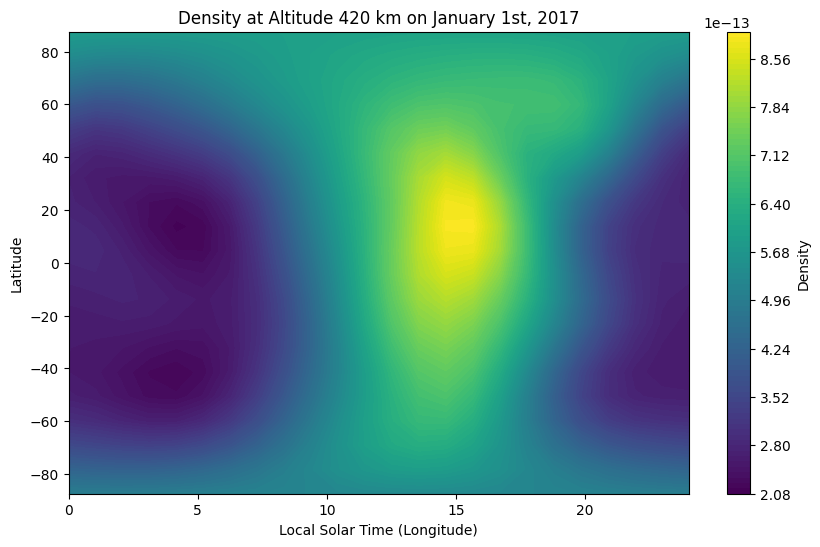

In [12]:
def reshape(raw_data:np.ndarray)->np.ndarray:
    original_shape = raw_data.shape
    N = original_shape[1]
    nofLst = 24
    nofLat = 20
    nofAlt = 36
    
    # Check if the product of the new dimensions matches the original number of rows
    assert original_shape[0] == nofLst * nofLat * nofAlt, "The input data cannot be reshaped to the desired dimensions"
    
    reshaped_data = np.reshape(raw_data, (nofLst, nofLat, nofAlt, N), order="F")
    return reshaped_data

rho_2017 = load_data(2017)
rho_reshaped = reshape(rho_2017)

# Jan.01.2017
rho_sample = rho_reshaped[:, :, :, 0]


localSolarTimes = np.linspace(0, 24, 24) # 24 
latitudes = np.linspace(-87.5, 87.5, 20) # 20
altitudes = np.linspace(100, 800, 36)    # 36

nofAlt = altitudes.shape[0]
nofLst = localSolarTimes.shape[0]
nofLat = latitudes.shape[0]

# Select an altitude level to visualize, e.g., the middle altitude level
altitude_index = 16  # Approximately the middle of 36 levels
alt = altitudes[altitude_index]
print(f"altitude: {alt}")

# Plot the data for the selected hour and altitude
plt.figure(figsize=(10, 6))
plt.contourf(localSolarTimes, latitudes, rho_sample[:, :, altitude_index].T, 100, cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('Local Solar Time (Longitude)')
plt.ylabel('Latitude')
plt.title(f'Density at Altitude {altitudes[altitude_index]:.0f} km on January 1st, 2017')
plt.show()


altitude: 200.0


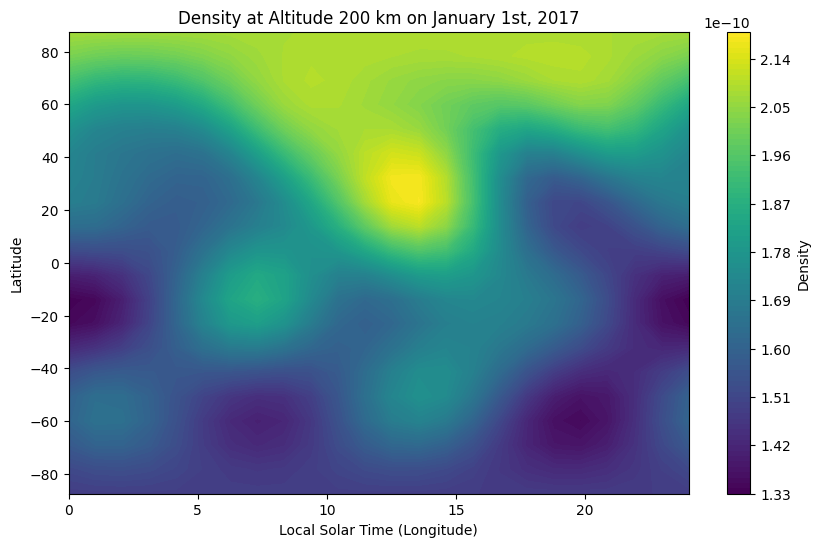

In [14]:
# Select an altitude level to visualize, e.g., the middle altitude level
altitude_index = 5  # Approximately the middle of 36 levels
alt = altitudes[altitude_index]
print(f"altitude: {alt}")

# Plot the data for the selected hour and altitude
plt.figure(figsize=(10, 6))
plt.contourf(localSolarTimes, latitudes, rho_sample[:, :, altitude_index].T, 100, cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('Local Solar Time (Longitude)')
plt.ylabel('Latitude')
plt.title(f'Density at Altitude {altitudes[altitude_index]:.0f} km on January 1st, 2017')
plt.show()